# Model Capstone Product Based CH2-PS081

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/drive/15ST_2Nmqlw3cw8U8Q_wHqPyaKd1YXTzq#scrollTo=J6Z17h4pO9VT"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/recommenders/blob/main/docs/examples/quickstart.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [3]:
url = 'https://github.com/MITA-Team/Machine-Learning/raw/main/Datasets.csv'
data = pd.read_csv(url)
data.head(5)

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,Physical,Total,Age_Years,Sex,Jaundice,Family_mem_with_ASD,Who_completed_the_test,ASD_traits,Therapy,Percentage
0,1,0,0,0,0,0,0,1,1,0,...,2,3,2,1,1,0,0,0,9,[0:2:2:2]
1,2,1,1,0,0,0,1,1,0,0,...,1,4,3,0,1,0,0,1,5,[1:2:1:4]
2,3,1,0,0,0,0,0,1,1,0,...,2,4,3,0,1,0,0,1,8,[1:3:2:3]
3,4,1,1,1,1,1,1,1,1,1,...,3,10,2,0,0,0,0,1,4,[3:4:3:9]
4,5,1,1,0,1,1,1,1,1,1,...,3,9,2,1,0,1,0,1,8,[2:4:3:8]


# Model Klasifikasi ASD

In [4]:
# Menginisialisasi data label dan input
X = data.drop(['Therapy', 'ASD_traits', 'Percentage', 'Case_No'], axis=1)
Y = data['ASD_traits']

In [5]:
# Split data dengan Training data 80% dan validation data 20%
training_size= int(len(data)*0.8)

X_train = X[:training_size]
X_test = X[training_size:]
Y_train = Y[:training_size]
Y_test = Y[training_size:]

In [6]:
model1 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_classification=model1.fit(X_train, Y_train, epochs=50,validation_data=(X_test, Y_test))

Epoch 1/50
57/57 [==============================] - 1s 6ms/step - loss: 0.3192 - accuracy: 0.8359 - val_loss: 0.1596 - val_accuracy: 0.9490
Epoch 2/50
57/57 [==============================] - 0s 4ms/step - loss: 0.1338 - accuracy: 0.9473 - val_loss: 0.1179 - val_accuracy: 0.9667
Epoch 3/50
57/57 [==============================] - 0s 3ms/step - loss: 0.1005 - accuracy: 0.9662 - val_loss: 0.1067 - val_accuracy: 0.9645
Epoch 4/50
57/57 [==============================] - 0s 3ms/step - loss: 0.0845 - accuracy: 0.9745 - val_loss: 0.0913 - val_accuracy: 0.9756
Epoch 5/50
57/57 [==============================] - 0s 3ms/step - loss: 0.0687 - accuracy: 0.9828 - val_loss: 0.0791 - val_accuracy: 0.9800
Epoch 6/50
57/57 [==============================] - 0s 3ms/step - loss: 0.0612 - accuracy: 0.9834 - val_loss: 0.0696 - val_accuracy: 0.9845
Epoch 7/50
57/57 [==============================] - 0s 3ms/step - loss: 0.0496 - accuracy: 0.9900 - val_loss: 0.0621 - val_accuracy: 0.9845
Epoch 8/50
57/57 [==

Evaluasi model classification

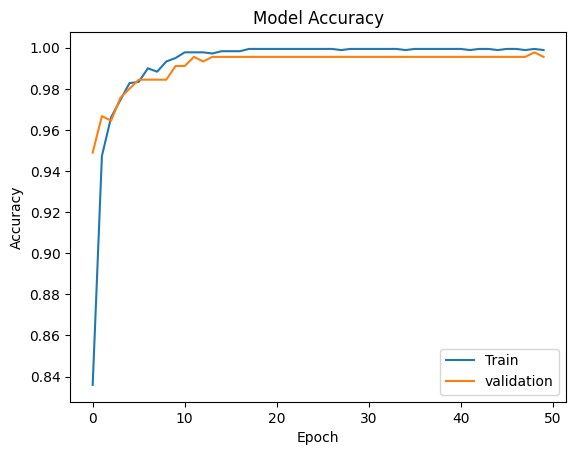

In [7]:
plt.plot(history_classification.history['accuracy'])
plt.plot(history_classification.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel("Accuracy")
plt.xlabel('Epoch')
plt.legend(['Train', 'validation'])
plt.show()

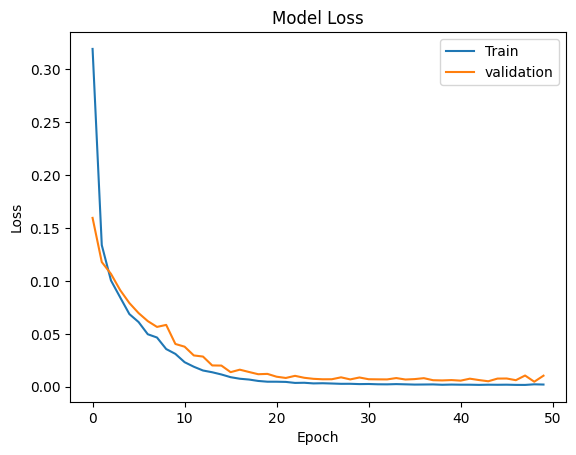

In [8]:
plt.plot(history_classification.history['loss'])
plt.plot(history_classification.history['val_loss'])
plt.title('Model Loss')
plt.ylabel("Loss")
plt.xlabel('Epoch')
plt.legend(['Train', 'validation'])
plt.show()

# Model Rekomendasi

In [9]:
# Menginisialisasi fitur dan label untuk sistem rekomendasi
label_encoder = LabelEncoder()
therapy = label_encoder.fit_transform(data['Therapy'])
features = data[['Speech', 'Sensory', 'Physical', 'Social', 'Total','ASD_traits']]

In [10]:
# Split data training 80% dan testing 20%
x_train = features[:training_size]
x_test = features[training_size:]
y_train = therapy[:training_size]
y_test = therapy[training_size:]

# Normalize data
x_train_norm = ((x_train * x_train.mean())/x_train.std()).to_numpy()
x_test_norm = ((x_test * x_test.mean())/x_test.std()).to_numpy()

# One hot encoding labels
y_train_encoded = tf.keras.utils.to_categorical(y_train, num_classes=12)
y_test_encoded = tf.keras.utils.to_categorical(y_test, num_classes=12)

In [11]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, input_shape=(6,), activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(12, activation='softmax')
])
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_reccomendations = model2.fit(x_train, y_train_encoded, epochs=50, batch_size=32, verbose=1, validation_data=(x_test,y_test_encoded))

Epoch 1/50
57/57 [==============================] - 1s 5ms/step - loss: 1.7730 - accuracy: 0.3764 - val_loss: 1.5046 - val_accuracy: 0.5432
Epoch 2/50
57/57 [==============================] - 0s 3ms/step - loss: 1.3192 - accuracy: 0.6774 - val_loss: 1.1528 - val_accuracy: 0.7738
Epoch 3/50
57/57 [==============================] - 0s 3ms/step - loss: 0.9614 - accuracy: 0.8343 - val_loss: 0.8808 - val_accuracy: 0.8027
Epoch 4/50
57/57 [==============================] - 0s 3ms/step - loss: 0.7483 - accuracy: 0.8548 - val_loss: 0.7058 - val_accuracy: 0.8736
Epoch 5/50
57/57 [==============================] - 0s 3ms/step - loss: 0.6199 - accuracy: 0.8780 - val_loss: 0.6424 - val_accuracy: 0.8692
Epoch 6/50
57/57 [==============================] - 0s 3ms/step - loss: 0.5599 - accuracy: 0.8742 - val_loss: 0.5763 - val_accuracy: 0.8869
Epoch 7/50
57/57 [==============================] - 0s 3ms/step - loss: 0.4942 - accuracy: 0.8969 - val_loss: 0.5321 - val_accuracy: 0.8825
Epoch 8/50
57/57 [==

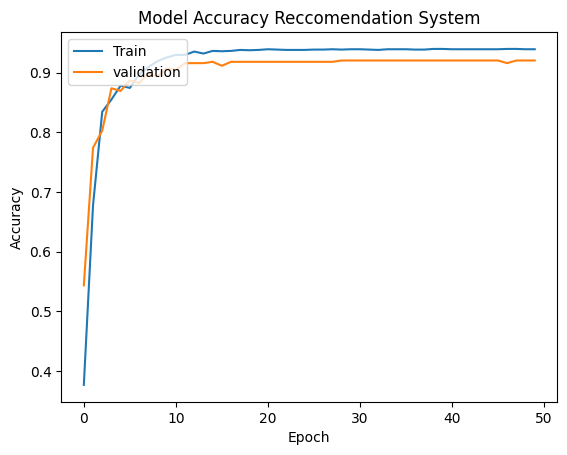

In [12]:
plt.plot(history_reccomendations.history['accuracy'])
plt.plot(history_reccomendations.history['val_accuracy'])
plt.title('Model Accuracy Reccomendation System')
plt.ylabel("Accuracy")
plt.xlabel('Epoch')
plt.legend(['Train', 'validation'], loc='upper left')
plt.show()

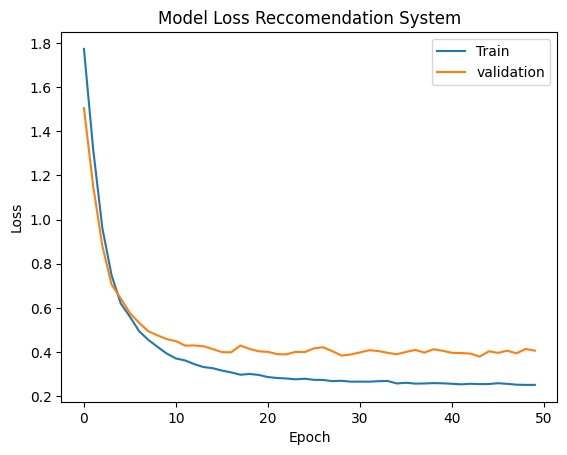

In [13]:
plt.plot(history_reccomendations.history['loss'])
plt.plot(history_reccomendations.history['val_loss'])
plt.title('Model Loss Reccomendation System')
plt.ylabel("Loss")
plt.xlabel('Epoch')
plt.legend(['Train', 'validation'])
plt.show()

In [14]:
# https://github.com/C23-PS475/Healcy_ML

# Prediksi model

Prediksi Klasifikasi

In [15]:
# Input Time!
input_A1 = int(input('A1: '))
input_A2 = int(input('A2: '))
input_A3 = int(input('A3: '))
input_A4 = int(input('A4: '))
input_A5 = int(input('A5: '))
input_A6 = int(input('A6: '))
input_A7 = int(input('A7: '))
input_A8 = int(input('A8: '))
input_A9 = int(input('A9: '))
input_A10 = int(input('A10: '))
input_speech = input_A1 + input_A5 + input_A3
input_social = input_A1 + input_A2 + input_A3 + input_A4 + input_A6 + input_A7 + input_A9 + input_A10
input_sensory = input_A1 + input_A6 + input_A8 + input_A10
input_physical = input_A7 + input_A8 + input_A9
input_total = input_A1 + input_A2 + input_A3 + input_A4 + input_A5 + input_A6 + input_A7 + input_A8 + input_A9 + input_A10
input_Ages_Years = int(input('Age: '))
input_Sex = int(input('Sex: '))
input_Jaudience = int(input('Jaudience: '))
input_Family_mem_with_ASD = int(input('Family_mem_with_ASD: '))
input_Who_completed_the_test = int(input('Who_completed_the_test: '))


In [16]:
user_input = pd.DataFrame([[input_A1, input_A2, input_A3, input_A4, input_A5,
                            input_A6, input_A7, input_A8, input_A9, input_A10,
                            input_speech, input_social, input_sensory, input_physical,
                            input_total, input_Ages_Years, input_Sex, input_Jaudience,
                            input_Family_mem_with_ASD, input_Who_completed_the_test]],
                          columns=['A1','A2','A3','A4','A5','A6','A7','A8', 'A9', 'A10',
                                   'Speech', 'Sensory', 'Physical', 'Social',
                                   'Total', 'Age_Years', 'Sex', 'Jaudience',
                                   'Family_mem_with_ASD', 'Who_completed_the_test'])

In [17]:
print(user_input)
# Membuat prediksi pada data uji
predictions = model1.predict(user_input)
# Mengevaluasi hasil prediksi (berdasarkan threshold 0.5)
predicted_labels = (predictions > 0.5).astype(int)
if predicted_labels == 1:
  print(f'{predictions} Ada kemungkinan ASD')
else:
  print(f'{predictions} Tidak ada kemungkinan ASD')

   A1  A2  A3  A4  A5  A6  A7  A8  A9  A10  Speech  Sensory  Physical  Social  \
0   1   0   1   0   0   0   1   1   0    1       2        4         3       2   

   Total  Age_Years  Sex  Jaudience  Family_mem_with_ASD  \
0      5          2    1          0                    0   

   Who_completed_the_test  
0                       0  
1/1 [==============================] - 0s 146ms/step
[[1.]] Ada kemungkinan ASD


Melakukan prediksi untuk terapy

In [18]:
# Memasukkan prediksi ASD ke dalam frame yang sama
# Untuk selanjutnya masuk ke rekomendasi terapi
user_input['ASD_traits'] = predicted_labels
user_input = user_input[['Speech', 'Sensory', 'Physical', 'Social', 'Total', 'ASD_traits']]


In [19]:
predictions = model2.predict(user_input)
# Mengambil 5 hasil prediksi tertinggi
top_n = 3
top_indices = np.argsort(predictions[0])[::-1][:top_n]
top_probabilities = predictions[0][top_indices]

label_asli = {1:'Speech 1', 2:'Speech 2', 3: 'Speech 3', 4:'Social 1', 5:'Social 2', 6:'Social 3',
              7:'Sensory 1', 8:'Sensory 2', 9:'Sensory 3', 10:'Physical 1', 11:'Physical 2', 12:'Physical 3'}

# Menampilkan hasil prediksi dalam bentuk label asli
print(f"Top {top_n} Predicted Therapies (Original Labels):")
for label, prob in zip(top_indices, top_probabilities):
    original_label = label_asli[label]
    print(f"{original_label}: {prob:.4f}")

1/1 [==============================] - 0s 69ms/step
Top 3 Predicted Therapies (Original Labels):
Sensory 1: 0.9997
Sensory 2: 0.0003
Physical 1: 0.0000


Nama gambar:  ed73c58d-7b74-45c7-9988-cdd806df38fc.png


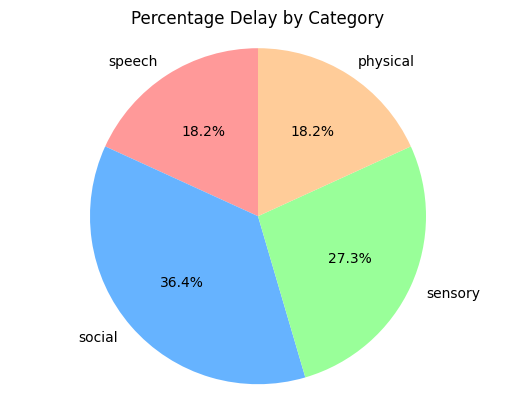

In [21]:
import matplotlib.pyplot as plt
import uuid
def percentage_delay(A):
    categories = ['speech', 'social', 'sensory', 'physical']
    a_cat_list = [
        [1, 1, 1, 0],
        [0, 1, 0, 0],
        [1, 1, 0, 0],
        [0, 1, 0, 0],
        [1, 1, 0, 0],
        [0, 1, 1, 0],
        [0, 1, 0, 1],
        [0, 0, 1, 1],
        [0, 1, 0, 1],
        [0, 1, 1, 0]
    ]

    total_cases = len(A)
    category_sums = {category: 0 for category in categories}

    for i in range(total_cases):
        current_a = A[i]

        if current_a == 1:
            current_a_cat = a_cat_list[i]
            for j in range(len(categories)):
                category_sums[categories[j]] += current_a_cat[j]

    # Calculate the total sum across all categories
    total_sum = sum(category_sums.values())

    # Calculate the percentage for each category
    category_percentages = {category: (count / total_sum) * 100 for category, count in category_sums.items()}

    # Create a pie chart
    labels = list(category_percentages.keys())
    sizes = list(category_percentages.values())

    #add colors
    colors = ["#ff9999","#66b3ff","#99ff99","#ffcc99"]

    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
    plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is drawn as a circle.

    plt.title('Percentage Delay by Category')
    nama_gambar = str(uuid.uuid4()) + '.png'
    # Menyimpan gambar
    plt.savefig(nama_gambar)
    print('Nama gambar: ', nama_gambar)
    plt.show()
    

A = [input_A1, input_A2, input_A3, input_A4, input_A5, input_A6, input_A7, input_A8, input_A9, input_A10]
percentage_delay(A)
